In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# P1 Tasks

In [3]:
df = pd.read_csv("playlist_2010to2022.csv")

In [4]:
# P1 Tasks
df.head()

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   playlist_url       2300 non-null   object 
 1   year               2300 non-null   int64  
 2   track_id           2300 non-null   object 
 3   track_name         2300 non-null   object 
 4   track_popularity   2300 non-null   int64  
 5   album              2300 non-null   object 
 6   artist_id          2300 non-null   object 
 7   artist_name        2300 non-null   object 
 8   artist_genres      2300 non-null   object 
 9   artist_popularity  2300 non-null   int64  
 10  danceability       2299 non-null   float64
 11  energy             2299 non-null   float64
 12  key                2299 non-null   float64
 13  loudness           2299 non-null   float64
 14  mode               2299 non-null   float64
 15  speechiness        2299 non-null   float64
 16  acousticness       2299 

In [6]:
df.describe()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2300.000000,2300.000000,2300.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2011.000000,70.943478,72.869565,0.660116,0.693047,5.277947,-5.784040,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128,3.982166
std,6.634692,12.291526,12.179263,0.141137,0.164838,3.628494,2.080853,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588,0.219054
min,2000.000000,0.000000,29.000000,0.162000,0.051900,0.000000,-21.107000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000,1.000000
25%,2005.000000,66.000000,65.000000,0.572000,0.586000,2.000000,-6.823500,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000,4.000000
50%,2011.000000,72.000000,74.000000,0.671000,0.712000,5.000000,-5.511000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000,4.000000
75%,2017.000000,79.000000,82.000000,0.759500,0.820000,8.000000,-4.364500,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000,4.000000
max,2022.000000,100.000000,100.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.978000,0.985000,0.843000,0.974000,210.857000,688453.000000,5.000000


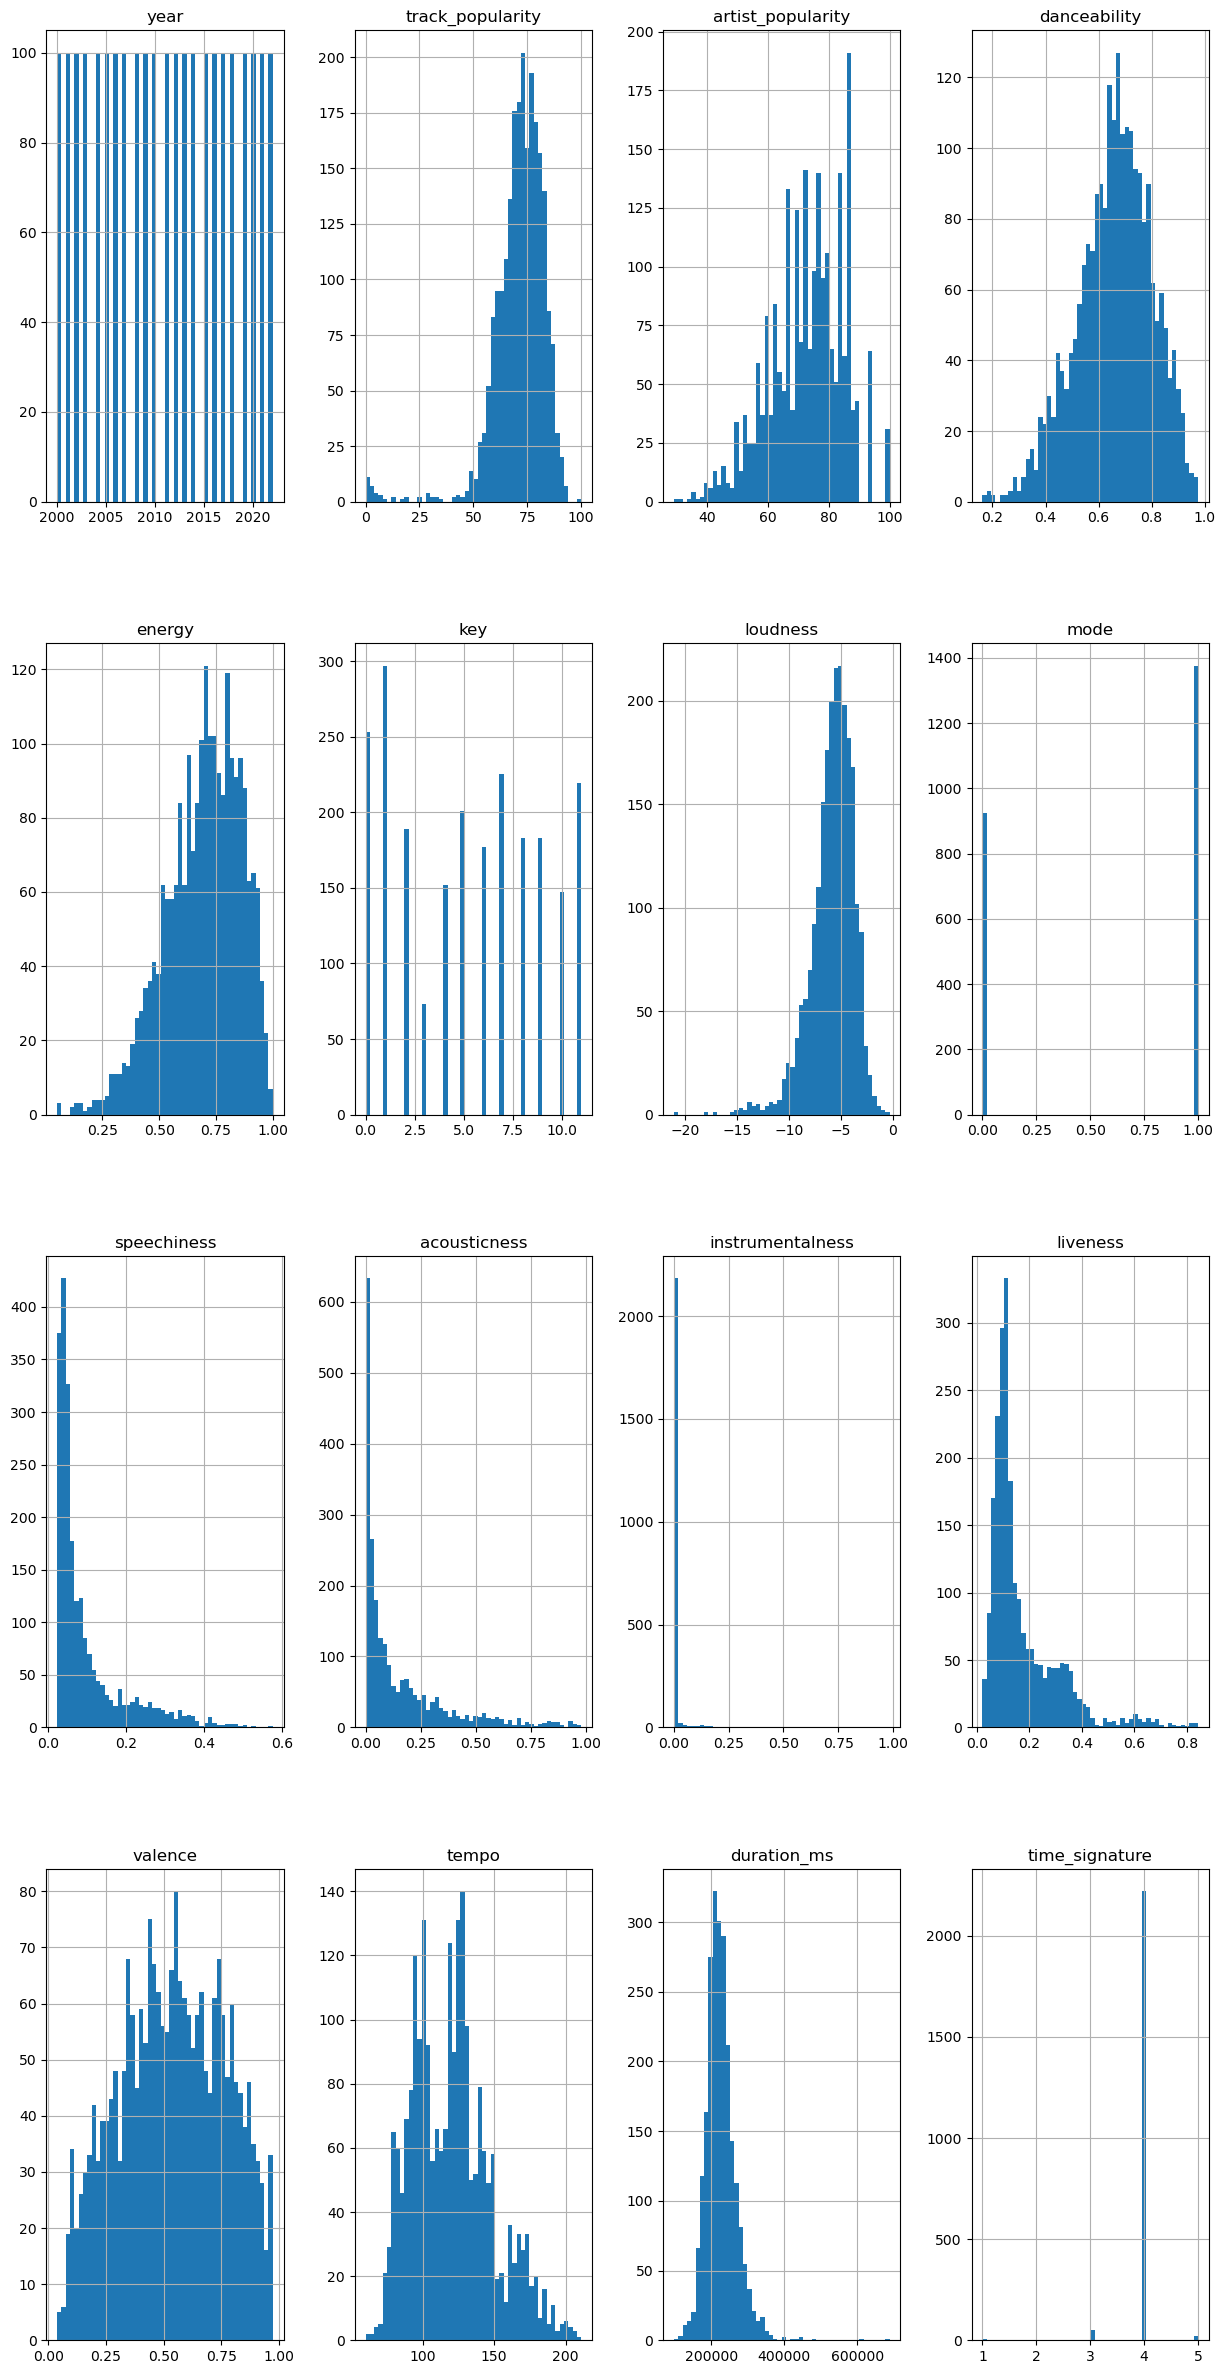

In [7]:
# df.hist(bins=50, figsize=(15,20))
# histogram for year gives a better result if bins=10
df.hist(bins=50, figsize=(15, 30))
plt.show()

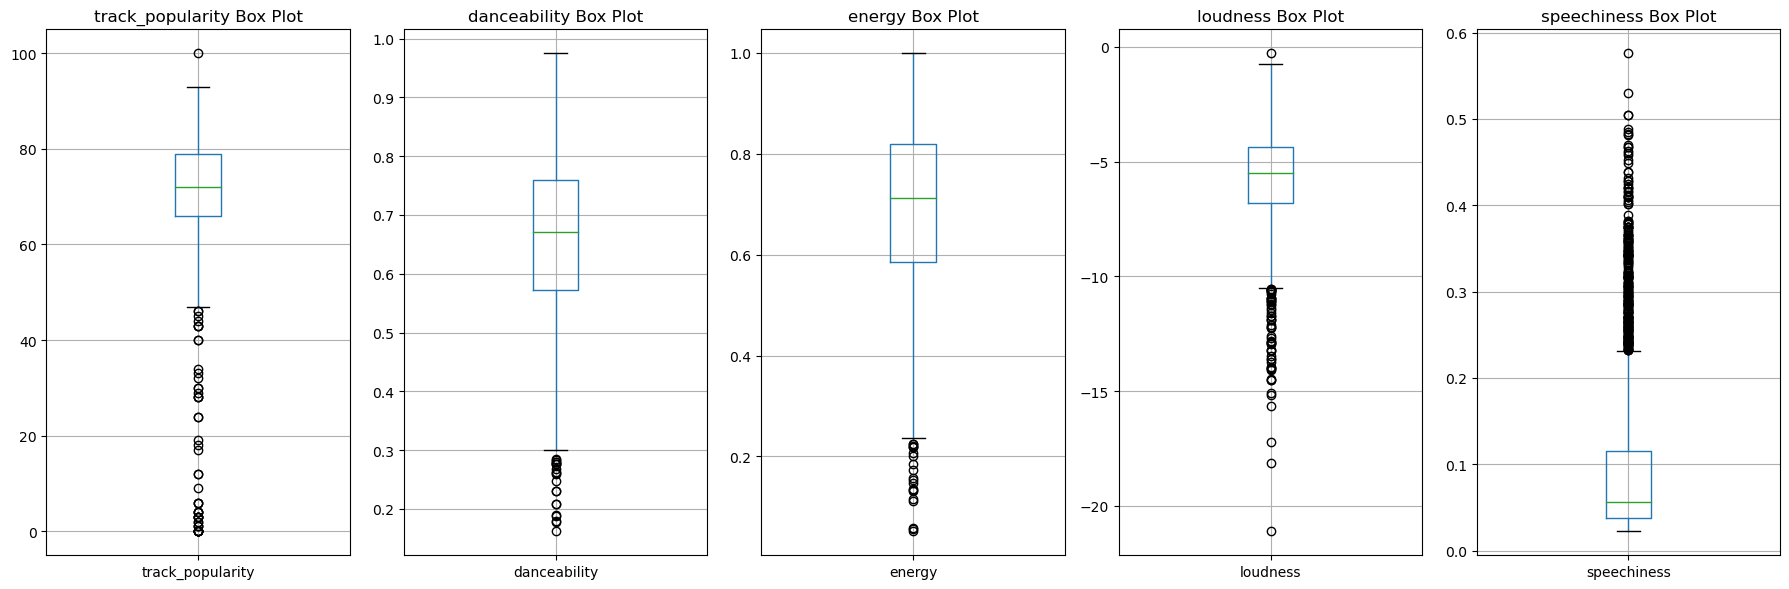

In [8]:
features = [
    'track_popularity', 'danceability', 'energy', 'loudness', 
    'speechiness'
]
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(18, 6))
for i, attribute in enumerate(features):
    df[[attribute]].boxplot(ax=axes[i])
    axes[i].set_title(attribute+' Box Plot')

plt.tight_layout()

plt.show()

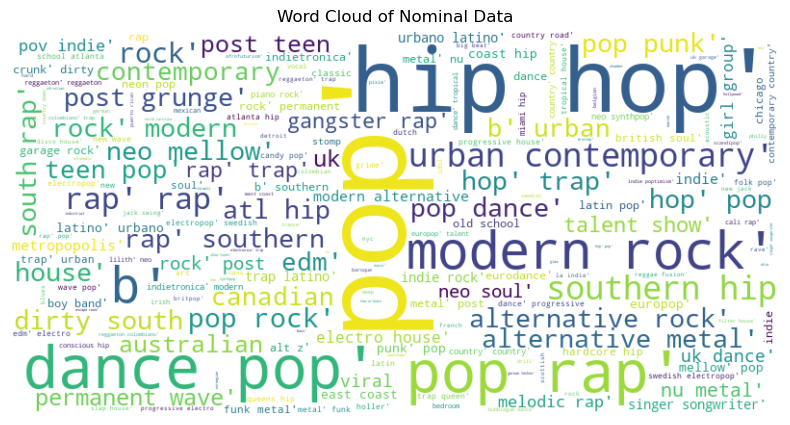

In [9]:
category = df['artist_genres'].unique()
wordcloud = WordCloud(width=800, height = 400, background_color = 'white').generate(' '.join(category))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Nominal Data')
plt.show()

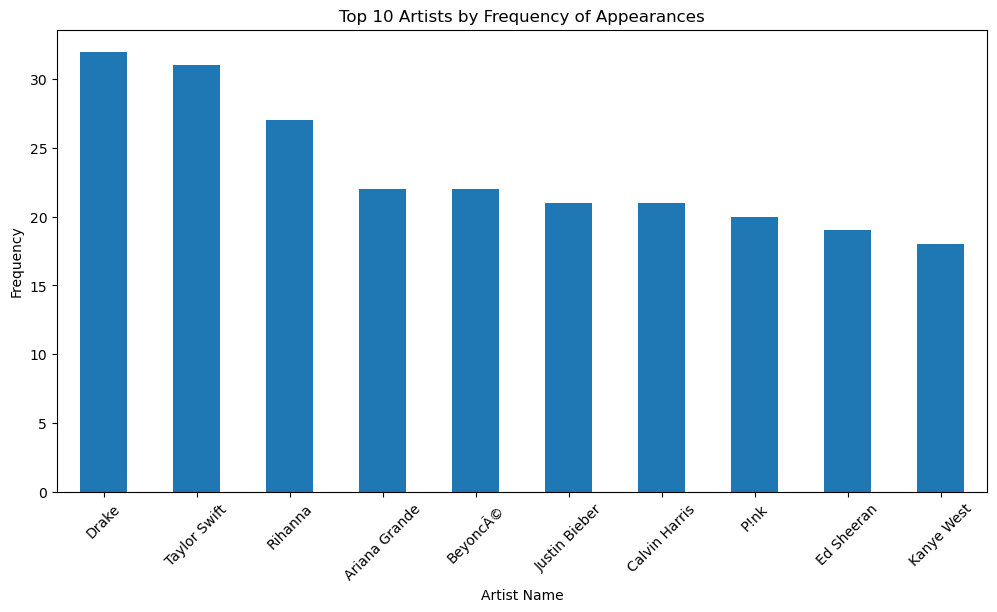

In [10]:
top_artists = df['artist_name'].value_counts().head(10)

# Create a bar chart to visualize the frequency of artist appearances
plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar')
plt.xlabel('Artist Name')
plt.ylabel('Frequency')
plt.title('Top 10 Artists by Frequency of Appearances')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

<Axes: xlabel='loudness', ylabel='track_popularity'>

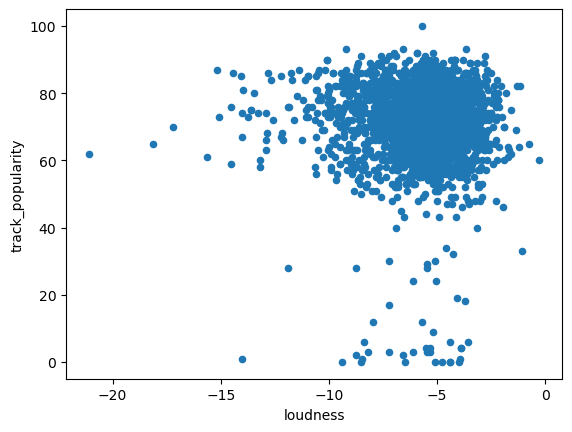

In [11]:
df.plot(kind="scatter", x="loudness", y="track_popularity")

<Axes: xlabel='danceability', ylabel='energy'>

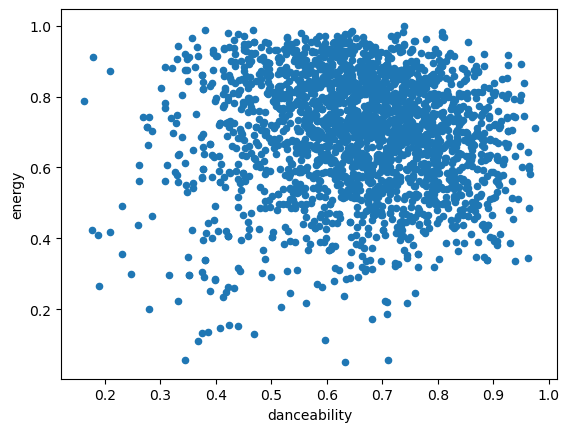

In [12]:
df.plot(kind="scatter", x="danceability", y="energy")

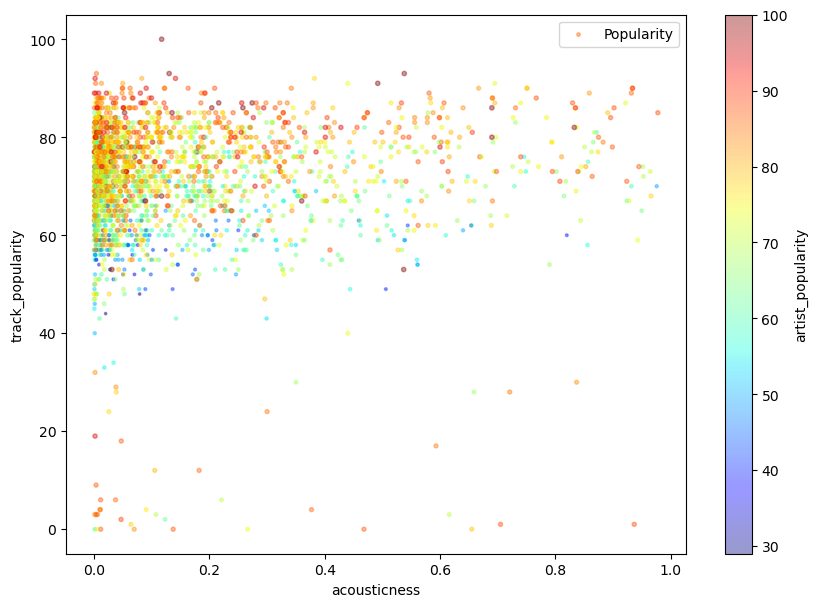

In [13]:
df.plot(kind="scatter", x="acousticness", y="track_popularity", alpha=0.4,
    s=df["artist_popularity"]/10, label="Popularity", figsize=(10,7),
    c="artist_popularity", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [14]:
incomplete_rows = df[df.isnull().any(axis=1)].head()
incomplete_rows 

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
447,https://open.spotify.com/playlist/37i9dQZF1DWT...,2004,6MFQeWtk7kxWGydnJB2y36,These Words,68,Unwritten,7o95ZoZt5ZYn31e9z1Hc0a,Natasha Bedingfield,"['dance pop', 'pop', 'post-teen pop']",64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
correlation_matrix = df.corr() 
correlation_matrix

C:\Users\danie\AppData\Local\Temp\ipykernel_18184\2757002402.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
year,1.000000,0.218578,0.463891,0.079579,-0.213265,-0.012309,-0.087451,-0.008052,0.026364,0.144010,-0.071127,-0.027719,-0.192476,0.028505,-0.340160,-0.016431
track_popularity,0.218578,1.000000,0.331063,0.006881,-0.074284,-0.047865,-0.018558,0.019854,-0.027161,0.058311,-0.020854,-0.020033,-0.067300,-0.013565,-0.043956,-0.038985
artist_popularity,0.463891,0.331063,1.000000,0.028621,-0.108966,-0.029549,-0.029041,-0.044217,0.048929,0.061085,-0.073707,0.004202,-0.125514,-0.009967,-0.024310,-0.010795
danceability,0.079579,0.006881,0.028621,1.000000,-0.040575,0.036666,0.028889,-0.123337,0.171114,-0.105241,0.018217,-0.084653,0.409612,-0.193770,-0.105517,0.086461
energy,-0.213265,-0.074284,-0.108966,-0.040575,1.000000,0.004318,0.691206,-0.056107,-0.005981,-0.543773,0.009142,0.148944,0.388810,0.125645,-0.040421,0.132879
key,-0.012309,-0.047865,-0.029549,0.036666,0.004318,1.000000,0.004074,-0.145893,0.008924,-0.010715,-0.009785,-0.027931,0.033535,-0.001949,-0.007011,-0.040845
loudness,-0.087451,-0.018558,-0.029041,0.028889,0.691206,0.004074,1.000000,-0.026781,-0.038021,-0.414999,-0.124393,0.084871,0.307299,0.092811,-0.082781,0.073840
mode,-0.008052,0.019854,-0.044217,-0.123337,-0.056107,-0.145893,-0.026781,1.000000,-0.069799,0.054809,-0.035061,-0.023613,-0.071995,0.035134,0.013255,-0.005918
speechiness,0.026364,-0.027161,0.048929,0.171114,-0.005981,0.008924,-0.038021,-0.069799,1.000000,-0.037280,-0.056315,0.066531,0.101180,0.066760,0.014558,0.066111
acousticness,0.144010,0.058311,0.061085,-0.105241,-0.543773,-0.010715,-0.414999,0.054809,-0.037280,1.000000,0.002361,-0.095045,-0.204592,-0.094712,0.000959,-0.094030


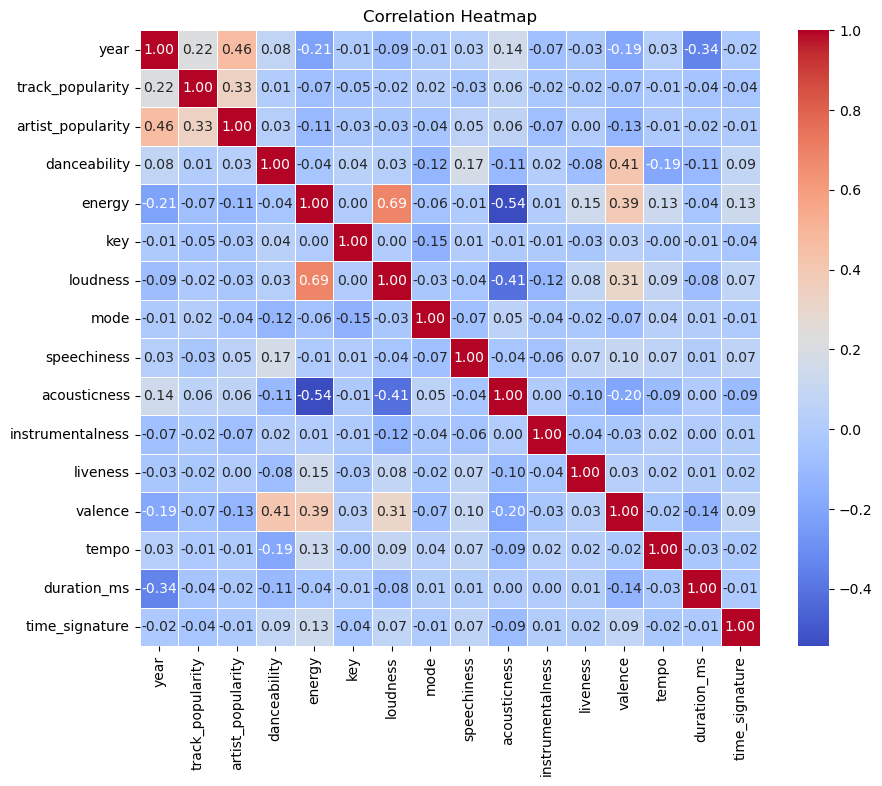

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# P2 Tasks

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

<Axes: >

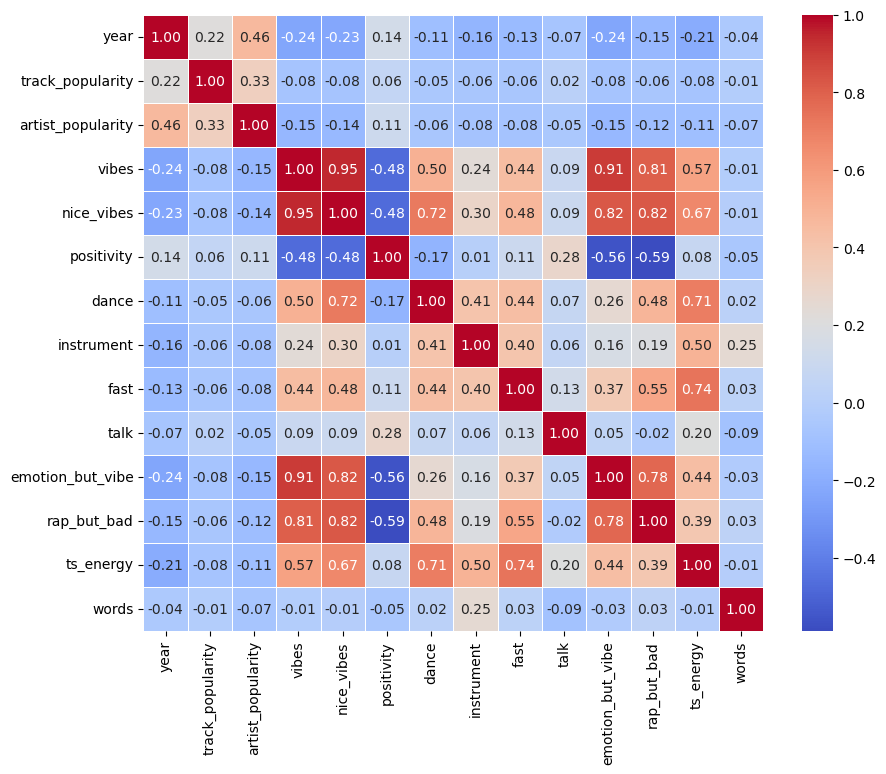

In [26]:
df["positivity"] = df["loudness"] * df["valence"]
df["dance"] = df["danceability"] * df["energy"]
df["instrument"] = df["instrumentalness"] - df["acousticness"]
df["fast"] = df["energy"] * df["tempo"]
df["talk"] = df["speechiness"] * df["loudness"]
df["emotion_but_vibe"] = df["valence"] / df["danceability"]

df["rap_but_bad"] = df["valence"] * df ["tempo"]

df["ts_energy"] = df["time_signature"] * df["energy"]

df["words"] = df["instrumentalness"] * df["speechiness"]

df["nice_vibes"] = df["energy"] * df["valence"]

df["vibes"] = df["emotion_but_vibe"] * df["nice_vibes"]
new_df = df[["year", "track_popularity", "artist_popularity", "vibes", "nice_vibes", "positivity", "dance", "instrument", "fast", "talk", "emotion_but_vibe", "rap_but_bad", "ts_energy", "words"]]
correlation_matrix = new_df.corr() 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [19]:
df = df.dropna()

X = df.drop(columns=["artist_popularity", "playlist_url", "track_id", "artist_id", "track_name", "artist_name", "album","artist_genres"])#, "loudness"])
y = df["artist_popularity"]

model = ExtraTreesClassifier()
model.fit(X,y)
featr = model.feature_importances_
print(featr)

for feature_name, importance in zip(X, featr):
    print(f"Feature: {feature_name}, Importance: {importance}")

[0.05194    0.05057046 0.04691024 0.04559569 0.04594369 0.04776
 0.0154169  0.04858779 0.04840323 0.03701889 0.04563241 0.04543083
 0.04615227 0.04959078 0.00528162 0.04719385 0.04685033 0.04596538
 0.04597464 0.04567669 0.04566764 0.0464624  0.04597428]
Feature: year, Importance: 0.051940003040584416
Feature: track_popularity, Importance: 0.05057045563868209
Feature: danceability, Importance: 0.04691023942796105
Feature: energy, Importance: 0.045595691224791145
Feature: key, Importance: 0.045943691126434864
Feature: loudness, Importance: 0.047760004348273086
Feature: mode, Importance: 0.015416897353275253
Feature: speechiness, Importance: 0.048587790055402494
Feature: acousticness, Importance: 0.0484032335371202
Feature: instrumentalness, Importance: 0.03701888799359454
Feature: liveness, Importance: 0.04563240781482246
Feature: valence, Importance: 0.045430829127954646
Feature: tempo, Importance: 0.04615226910309065
Feature: duration_ms, Importance: 0.04959077690405901
Feature: time_

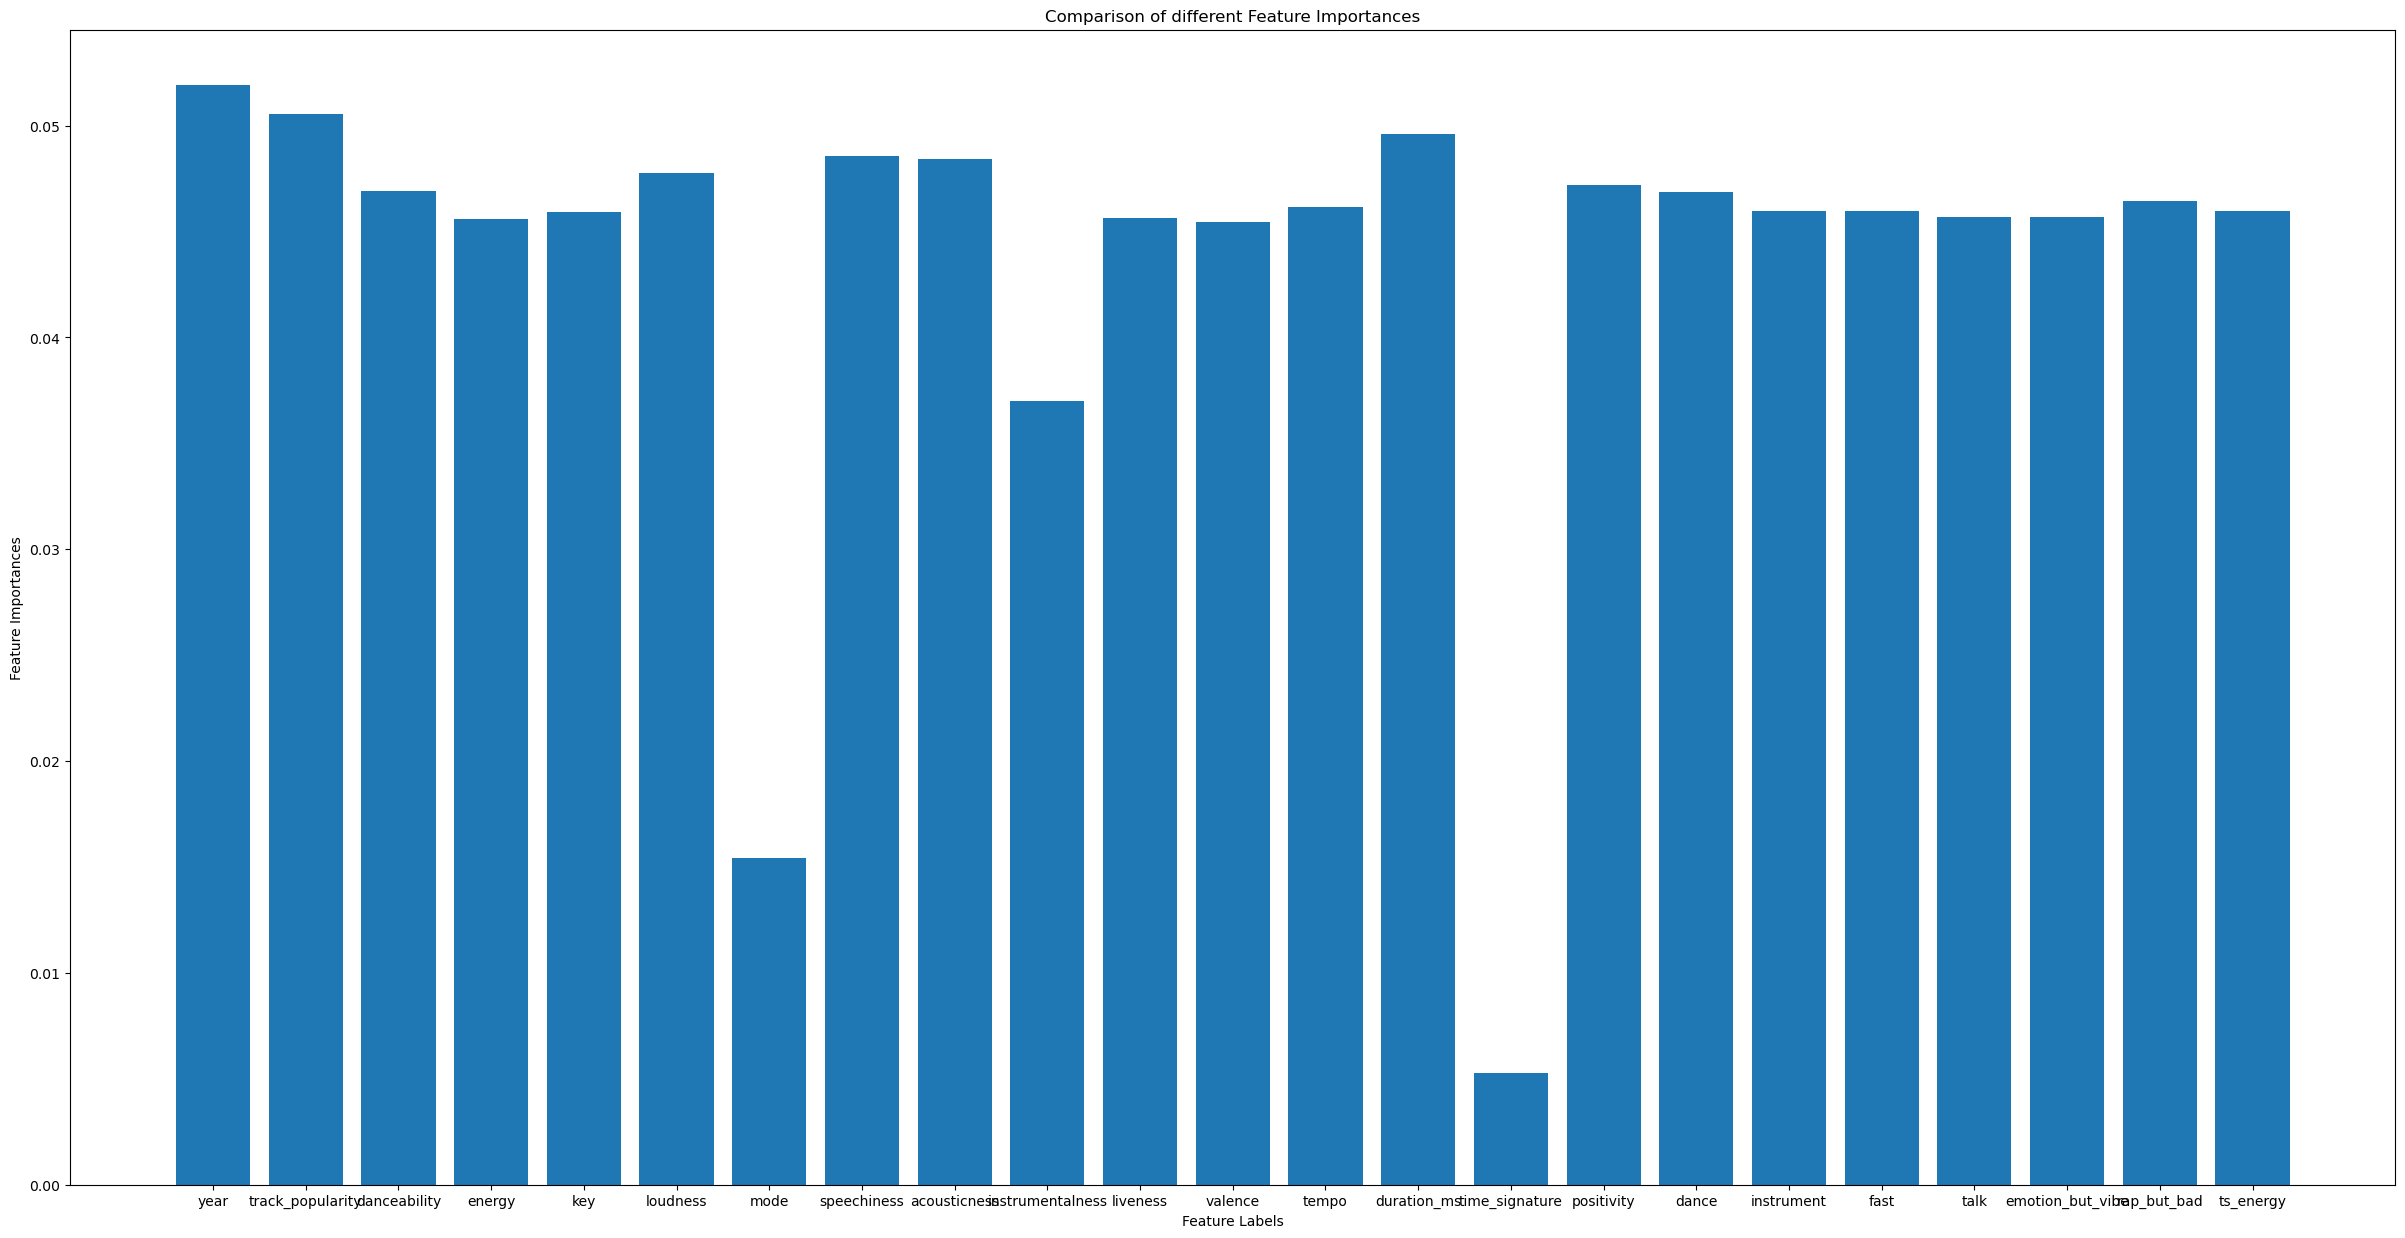

In [20]:

# Plotting a Bar Graph to compare the models
plt.figure(figsize=(30, 15))
plt.bar(X.columns, featr)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [21]:
# best_features = SelectKBest(score_func = chi2, k=10)
# fit = best_features.fit(X, y)
# df_scores = pd.DataFrame(fit.scores_)
# df_columns = pd.DataFrame(X.columns)
# featureScores = pd.concat([df_columns,df_scores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(10,'Score'))  #print 10 best features



In [22]:
# df["positivity"] = df["loudness"] * df["valence"]
# df["dance"] = df["danceability"] * df["energy"]
# df["instrument"] = df["instrumentalness"] - df["acousticness"]
# df["fast"] = df["energy"] * df["tempo"]
# df["talk"] = df["speechiness"] * df["loudness"]
# df["emotion_but_vibe"] = df["valence"] / df["danceability"]

# df["rap_but_bad"] = df["valence"] * df ["tempo"]

# df["ts_energy"] = df["time_signature"] * df["energy"]

# new_df = df[["year", "track_popularity", "artist_popularity", "positivity", "dance", "instrument", "fast", "talk", "emotion_but_vibe", "rap_but_bad", "ts_energy"]]
# correlation_matrix = new_df.corr() 
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)